### Risk and Return


#### Import the required libraries and dependencies.

In [1]:
import pandas as pd
from pathlib import Path
import numpy as np
import math
import matplotlib.pyplot as plt
%matplotlib inline

####  load the data

In [2]:
#using pandas and path
whalepath=Path("whale_navs.csv")
whale=pd.read_csv(whalepath)
# confirm it works
whale.head()

,date,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,S&P 500
0,2014-10-01,31.950240,14.991826,59.977830,51.948712,194.35
1,2014-10-02,31.936110,14.994072,59.978626,51.957619,194.38
2,2014-10-03,31.969707,14.999596,60.002264,52.022484,196.52
3,2014-10-06,32.048215,14.999471,60.006244,52.036387,196.29
4,2014-10-07,31.964216,14.994720,59.993735,52.005864,193.26


#### Calculating Daily returns with pandas

In [3]:
#functionto calculate daily returns using pandas pct_change
def daily_returns(i):
    x=whale.iloc[:,i].pct_change().dropna()
    return x
spy=daily_returns(5)
#check if it works
spy.head()

1    0.000154
2    0.011009
3   -0.001170
4   -0.015436
5    0.017489
Name: S&P 500, dtype: float64

---

## Quantative Analysis

###  Analyze the Performance


#### Plotting daily return

<AxesSubplot:title={'center':'BERKSHIRE HATHAWAY INC'}>

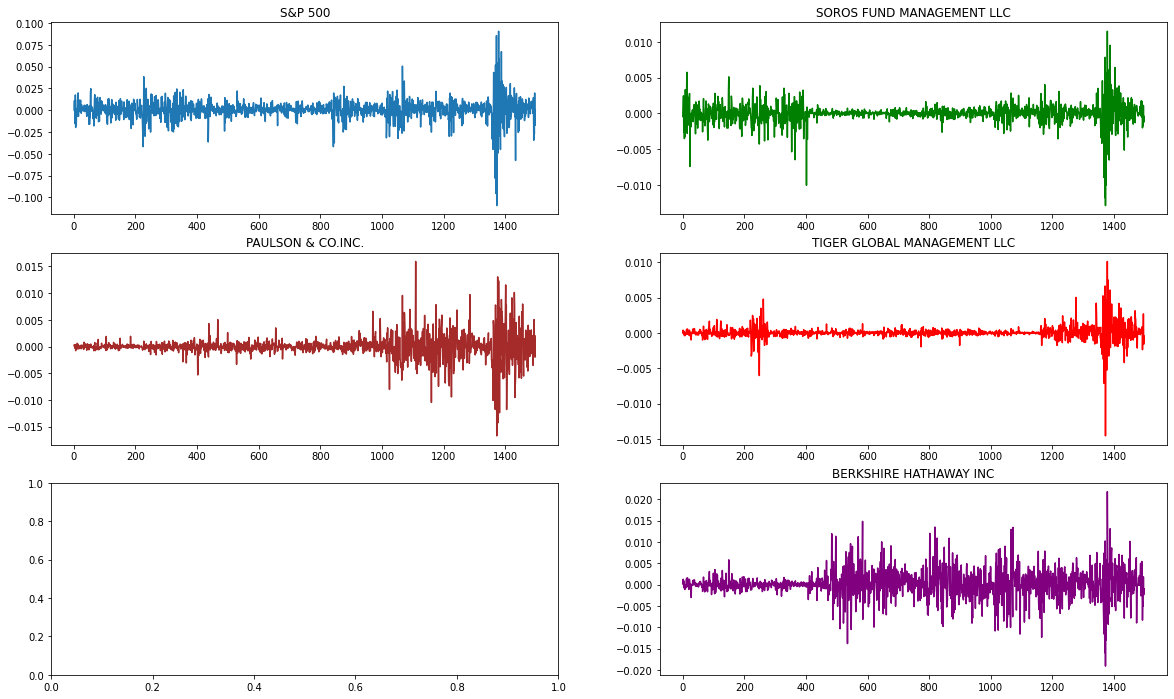

In [4]:
sfm=daily_returns(1)
pci=daily_returns(2)
tgm=daily_returns(3)
bhi=daily_returns(4)
dfs=['spy','sfm','pci','tgm','bhi']
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(20, 12))
spy.plot(ax=axes[0,0],title=spy.name)
sfm.plot(ax=axes[0,1],title=sfm.name,color='green')
pci.plot(ax=axes[1,0],title=pci.name,color='brown')
tgm.plot(ax=axes[1,1],title=tgm.name,color='red')
bhi.plot(ax=axes[2,1],title=bhi.name,color='purple')

#### Finding cumulative daily return

In [5]:
spycum=(1+spy).cumprod()
sfmcum=(sfm+1).cumprod()
pcicum=(pci+1).cumprod()
tgmcum=(tgm+1).cumprod()
bhicum=(bhi+1).cumprod()
spycum.tail()

1493    1.762645
1494    1.714484
1495    1.748341
1496    1.717983
1497    1.718858
Name: S&P 500, dtype: float64

In [6]:
sfmcum.tail()

1493    0.987355
1494    0.985640
1495    0.986739
1496    0.985498
1497    0.985086
Name: SOROS FUND MANAGEMENT LLC, dtype: float64

In [7]:
pcicum.tail()

1493    0.958187
1494    0.956378
1495    0.958409
1496    0.959740
1497    0.957887
Name: PAULSON & CO.INC., dtype: float64

In [8]:
tgmcum.tail()

1493    1.055714
1494    1.054373
1495    1.057221
1496    1.055539
1497    1.055081
Name: TIGER GLOBAL MANAGEMENT LLC, dtype: float64

In [9]:
bhicum.tail()

1493    1.244856
1494    1.238608
1495    1.240858
1496    1.237883
1497    1.236625
Name: BERKSHIRE HATHAWAY INC, dtype: float64

Plotting daily return

<AxesSubplot:title={'center':'BERKSHIRE HATHAWAY INC'}>

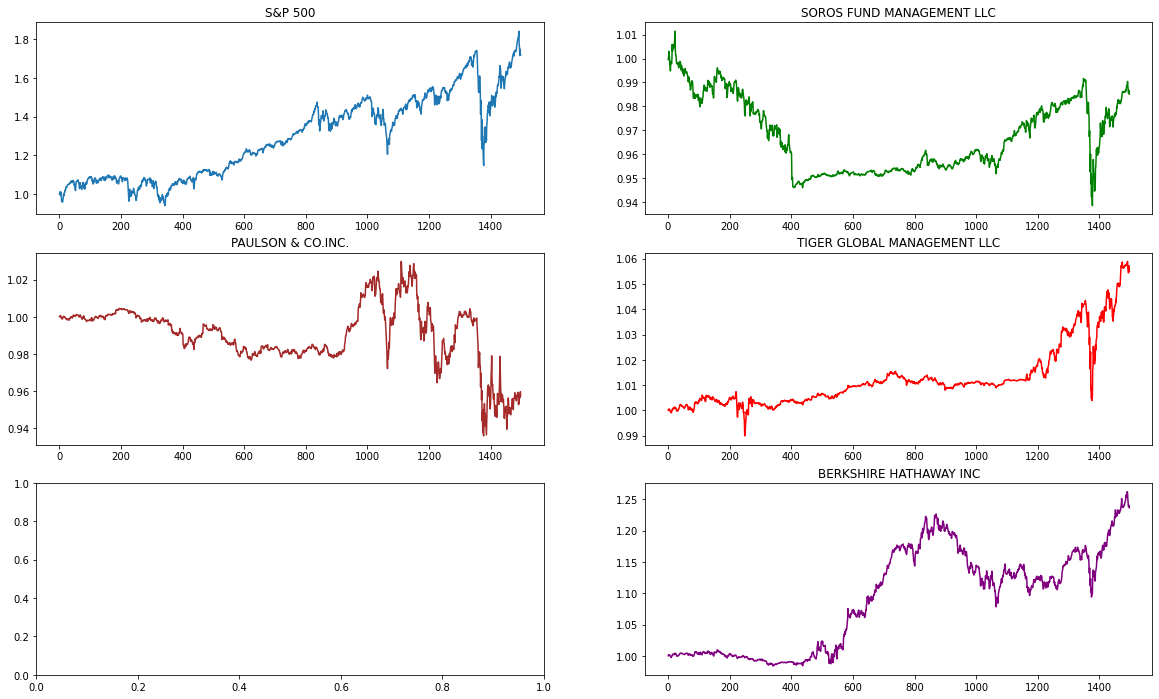

In [10]:
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(20, 12))
spycum.plot(ax=axes[0,0],title=spy.name)
sfmcum.plot(ax=axes[0,1],title=sfm.name,color='green')
pcicum.plot(ax=axes[1,0],title=pci.name,color='brown')
tgmcum.plot(ax=axes[1,1],title=tgm.name,color='red')
bhicum.plot(ax=axes[2,1],title=bhi.name,color='purple')

#### Answer the following question: Based on the cumulative return data and the visualization, do any of the four fund portfolios outperform the S&P 500 Index?

**Question** Based on the cumulative return data and the visualization, do any of the four fund portfolios outperform the S&P 500 Index?

**Answer** No, SPY has the best return over this peroid

---

### Analyze the Volatility

#### Drawing boxplots

Text(0.5, 1.0, 'Daily return boxplot')

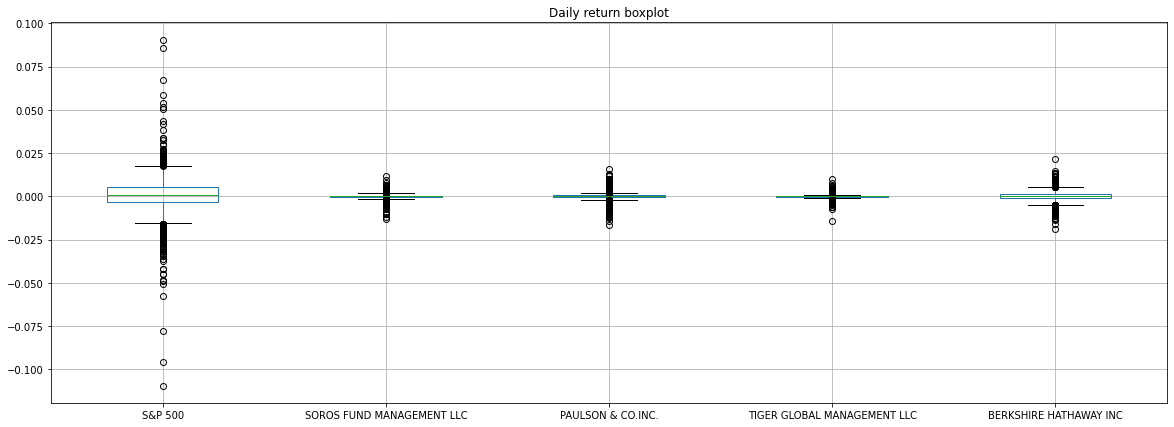

In [11]:
dr=pd.concat([spy,sfm,pci,tgm,bhi],axis=1)
ax=dr.boxplot(figsize=(20,7))
ax.set_title('Daily return boxplot')

#### Without spy

Text(0.5, 1.0, 'Daily return boxplot')

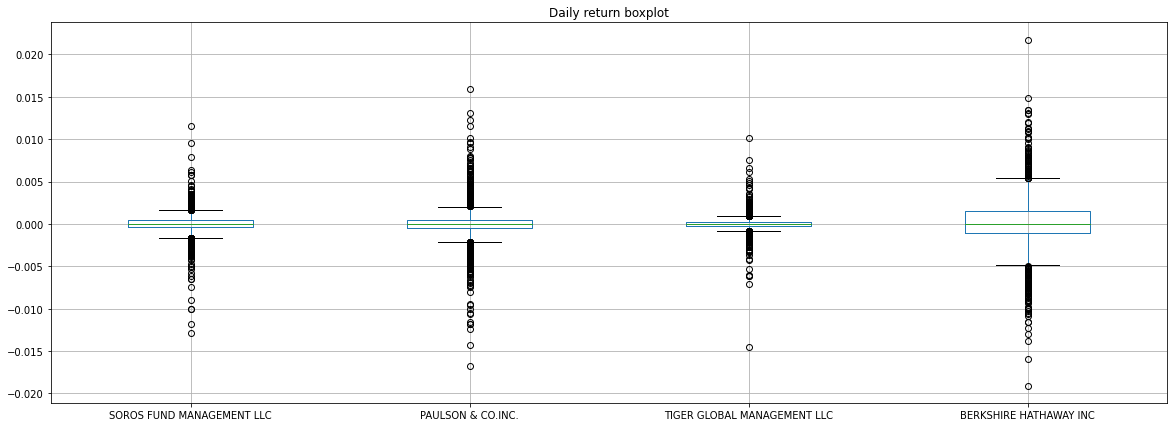

In [12]:
dr=pd.concat([spy,sfm,pci,tgm,bhi],axis=1)
dr=dr.drop(columns='S&P 500')
ax=dr.boxplot(figsize=(20,7))
ax.set_title('Daily return boxplot')

#### Answer the following question: Based on the box plot visualization of just the four fund portfolios, which fund was the most volatile (with the greatest spread) and which was the least volatile (with the smallest spread)?

**Question** Based on the box plot visualization of just the four fund portfolios, which fund was the most volatile (with the greatest spread) and which was the least volatile (with the smallest spread)?

**Answer** Berkshire Hathaway was the most volitile, while Tiger Global management was the least volatile

---

### Analyze the Risk

#### Reviewing the standard deviations

In [13]:
dr=pd.concat([spy,sfm,pci,tgm,bhi],axis=1)
st=dr.std(axis = 0, skipna = True)
#review the sorted values
st.sort_values(axis=0, ascending=True)

TIGER GLOBAL MANAGEMENT LLC    0.000996
SOROS FUND MANAGEMENT LLC      0.001405
PAULSON & CO.INC.              0.002199
BERKSHIRE HATHAWAY INC         0.003256
S&P 500                        0.011550
dtype: float64

####  Calculate the annualized standard deviation 

In [14]:
ast=st.multiply(math.sqrt(252))
#review the sorted values
ast.sort_values(axis=0, ascending=True)

TIGER GLOBAL MANAGEMENT LLC    0.015804
SOROS FUND MANAGEMENT LLC      0.022297
PAULSON & CO.INC.              0.034912
BERKSHIRE HATHAWAY INC         0.051692
S&P 500                        0.183345
dtype: float64

#### Plotting the rolling standard deviations

<AxesSubplot:>

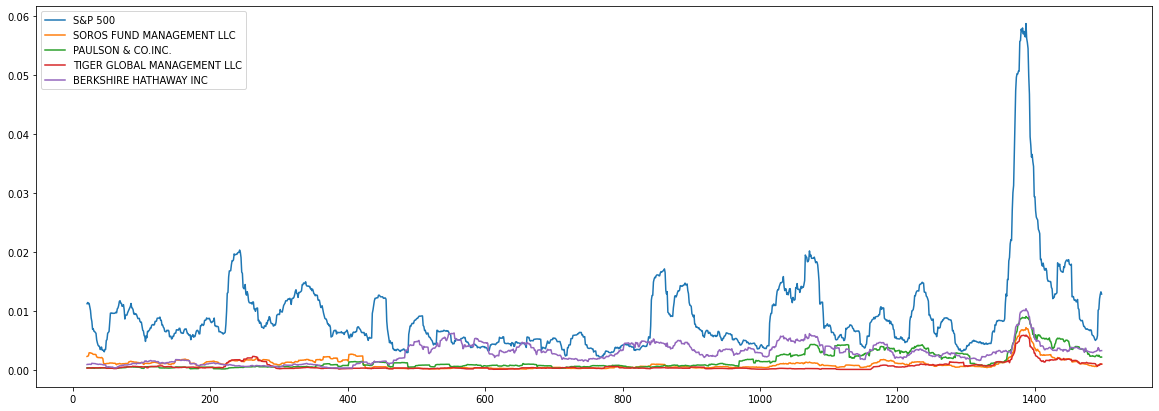

In [15]:
dr.rolling(window=21).std().dropna().plot(figsize=(20,7))

#### Plotting just the firms

<AxesSubplot:>

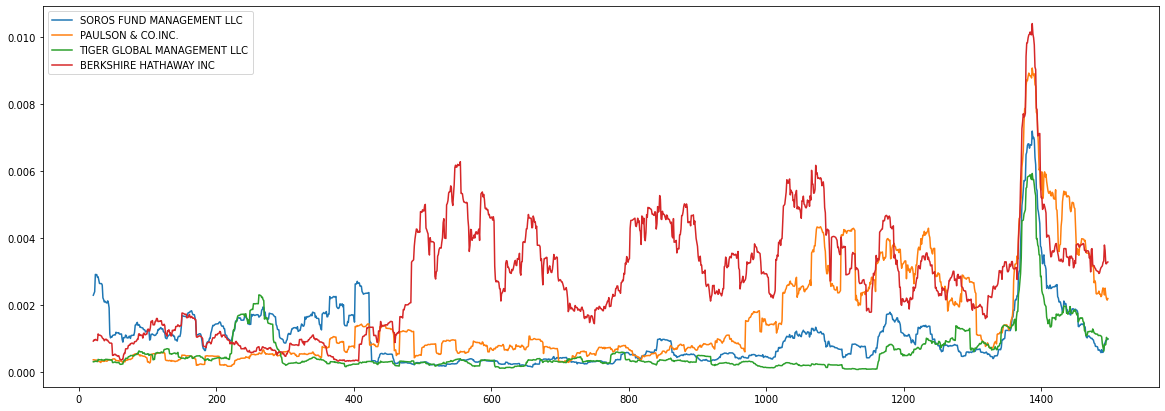

In [16]:
dr=dr.drop(columns='S&P 500')
dr.rolling(window=21).std().dropna().plot(figsize=(20,7))


#### Step 5: Answer the following three questions:

1. Based on the annualized standard deviation, which portfolios pose more risk than the S&P 500?

2. Based on the rolling metrics, does the risk of each portfolio increase at the same time that the risk of the S&P 500 increases?

3. Based on the rolling standard deviations of only the four fund portfolios, which portfolio poses the most risk? Does this change over time?

**Question 1**  Based on the annualized standard deviation, which portfolios pose more risk than the S&P 500?

**Answer 1** None of them

**Question 2** Based on the rolling metrics, does the risk of each portfolio increase at the same time that the risk of the S&P 500 increases?

**Answer 2** # For the most part, yes, but there are a few moments when this doesn't happen


**Question 3** Based on the rolling standard deviations of only the four fund portfolios, which portfolio poses the most risk? Does this change over time? 

**Answer 3** # Berkshire poses the most risk over the whole period, but at times earlier in the period soros fund had more risk

---

### Analyze the Risk-Return Profile


#### Calculating average annual return

In [17]:
#multiplying mean percent change by trading days
spyaar=spy.mean()*252
sfmaar=sfm.mean()*252
pciaar=pci.mean()*252
tgmaar=tgm.mean()*252
bhiaar=bhi.mean()*252

print('PCI: '+str(pciaar))
print("SFM: "+str(sfmaar))
print("TGM: "+str(tgmaar))
print("BHI: "+str(bhiaar))
print("SPY: "+str(spyaar))

PCI: -0.0066333213840035765
SFM: -0.002280741048882927
TGM: 0.009150797699176134
BHI: 0.03708987910446298
SPY: 0.10810232256280264


####  Calculate the Sharpe ratios

In [18]:
#divide the annualized average return by the annualized standard deviation for each
print("SPY: "+str(spyaar/ast.iloc[4]))
print("BHI: "+str(bhiaar/ast.iloc[3]))
print('PCI: '+str(pciaar/ast.iloc[2]))
print("SFM: "+str(sfmaar/ast.iloc[1]))
print("TGM: "+str(tgmaar/ast.iloc[0]))

SPY: 2.091264557292049
BHI: 2.346802563048981
PCI: -0.18999848260065072
SFM: -0.10229027693252664
TGM: 0.049910337309502506


#### Plotting sharpe ratios

<AxesSubplot:title={'center':'Sharpe ratios of the firms'}, xlabel='Fund'>

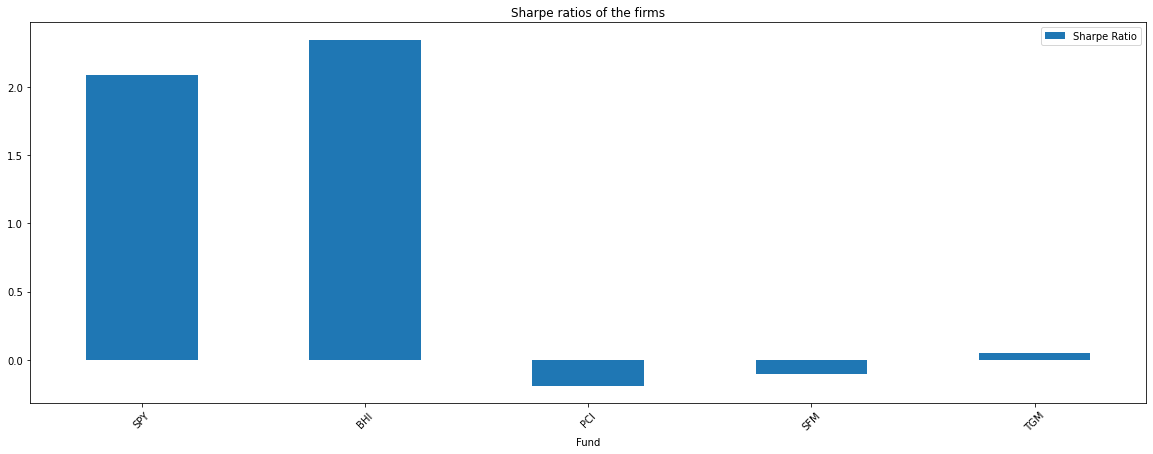

In [19]:
sr=pd.DataFrame({'Fund':['SPY','BHI','PCI','SFM','TGM'],'Sharpe Ratio':[spyaar/ast.iloc[4],bhiaar/ast.iloc[3],pciaar/ast.iloc[2],sfmaar/ast.iloc[1],tgmaar/ast.iloc[0]]})
sr.plot.bar(figsize=(20,7),x='Fund',rot=45,title='Sharpe ratios of the firms')

**Question** Which of the four portfolios offers the best risk-return profile? Which offers the worst?
    
**Answer** # Tiger Global Management has the highest rist return profile, while SPY has the worst


---

### Diversify the Portfolio

Your analysis is nearing completion. Now, you need to evaluate how the portfolios react relative to the broader market. Based on your analysis so far, choose two portfolios that you’re most likely to recommend as investment options.

#### Variance of the S&P 500 with a 60-day rolling window

<AxesSubplot:title={'center':'SPY Variance last 5 rows'}>

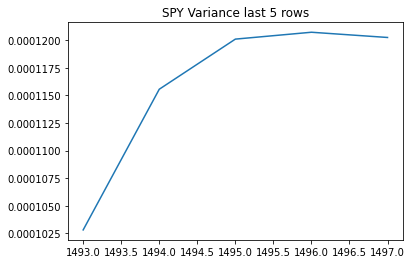

In [20]:
spy=daily_returns(5)
spyvar=spy.rolling(window=60).var().dropna()
spyvar.tail().plot(title='SPY Variance last 5 rows')

##### TGM Covariance

<AxesSubplot:title={'center':'TGM Covariance last 5 rows'}>

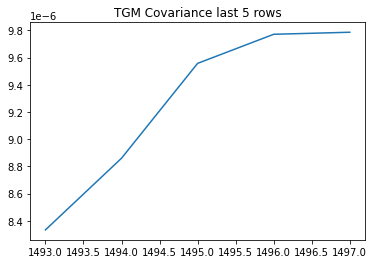

In [21]:
tgmcov = tgm.rolling(window=60).cov(spy)
tgmcov.tail().plot(title='TGM Covariance last 5 rows')

##### TGM Beta

In [22]:
tgmbeta=tgmcov/spyvar

##### TGM Average beta

In [23]:
tgmbeta.mean()

0.03093001487238777

##### Plotting the TGM beta

<AxesSubplot:title={'center':'TGM 60 day rolling beta'}>

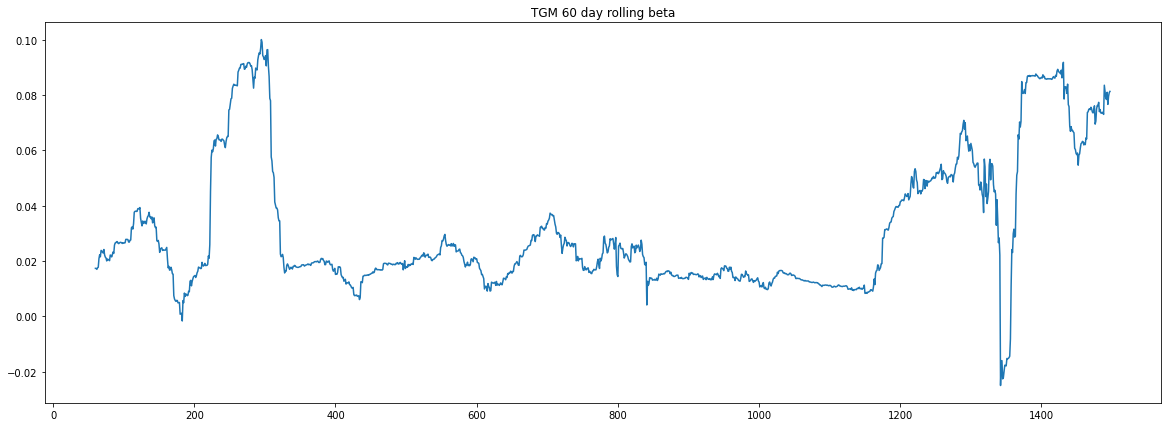

In [24]:
tgmbeta.plot(figsize=(20,7),title="TGM 60 day rolling beta")

##### SFM Covariance

<AxesSubplot:title={'center':'SFM Covariance last 5 rows'}>

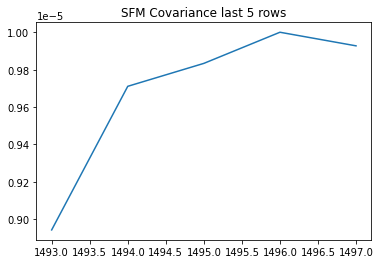

In [25]:
sfmcov = sfm.rolling(window=60).cov(spy)
sfmcov.tail().plot(title='SFM Covariance last 5 rows')

##### SFM Beta

In [26]:
sfmbeta=sfmcov/spyvar

##### Average SFM Beta

In [27]:
sfmbeta.mean()

0.0686227172631973

##### SFM Beta plot

<AxesSubplot:title={'center':'SFM 60 day rolling beta'}>

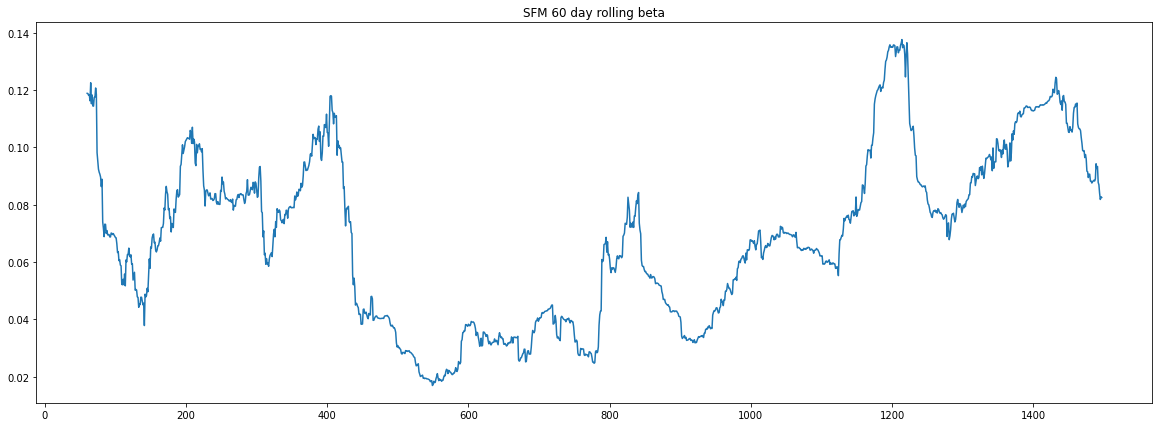

In [28]:
sfmbeta.plot(figsize=(20,7),title="SFM 60 day rolling beta")

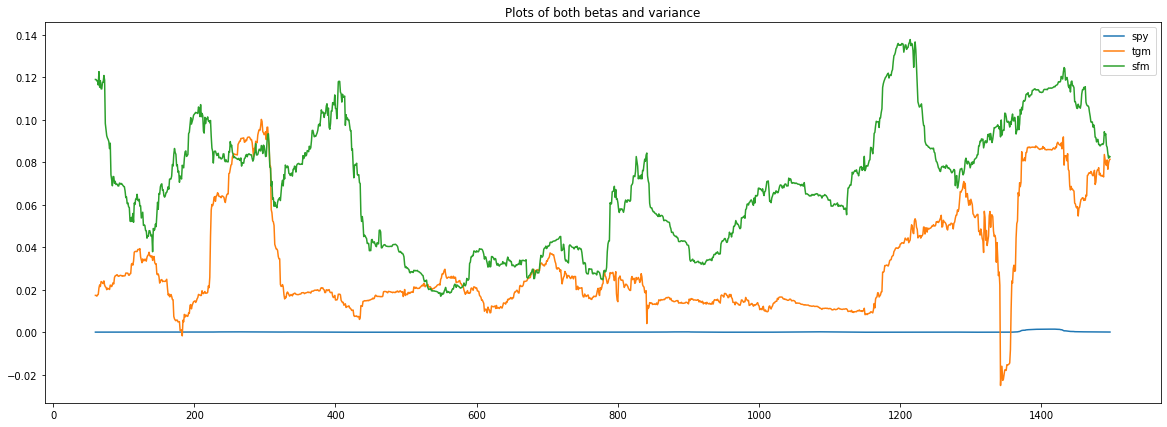

In [29]:
ax=spyvar.plot(figsize=(20,7),title='Plots of both betas and variance')
tgmbeta.plot(ax=ax)
sfmbeta.plot(ax=ax).legend(['spy','tgm','sfm'])

In [31]:
print(str(tgmbeta.mean()))
print(str(sfmbeta.mean()))

0.03093001487238777
0.0686227172631973


#### Answer the following two questions:

1. Which of the two portfolios seem more sensitive to movements in the S&P 500?

2. Which of the two portfolios do you recommend for inclusion in your firm’s suite of fund offerings?

**Question 1** Which of the two portfolios seem more sensitive to movements in the S&P 500?
    
**Answer 1** # SFM


**Question 2** Which of the two portfolios do you recommend for inclusion in your firm’s suite of fund offerings?
    
**Answer 2** # TGM

---